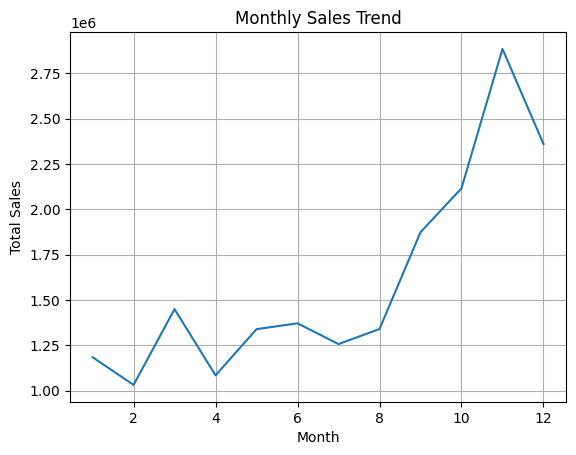

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV file
df = pd.read_csv("online_retail_ii.csv", encoding="ISO-8859-1")

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month number
df['Month'] = df['InvoiceDate'].dt.month

# Compute total price per row
df['TotalPrice'] = df['Quantity'] * df['Price']

# Aggregate monthly sales
monthly_sales = df.groupby('Month')['TotalPrice'].sum().reset_index()

# Plot
plt.plot(monthly_sales['Month'], monthly_sales['TotalPrice'])
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


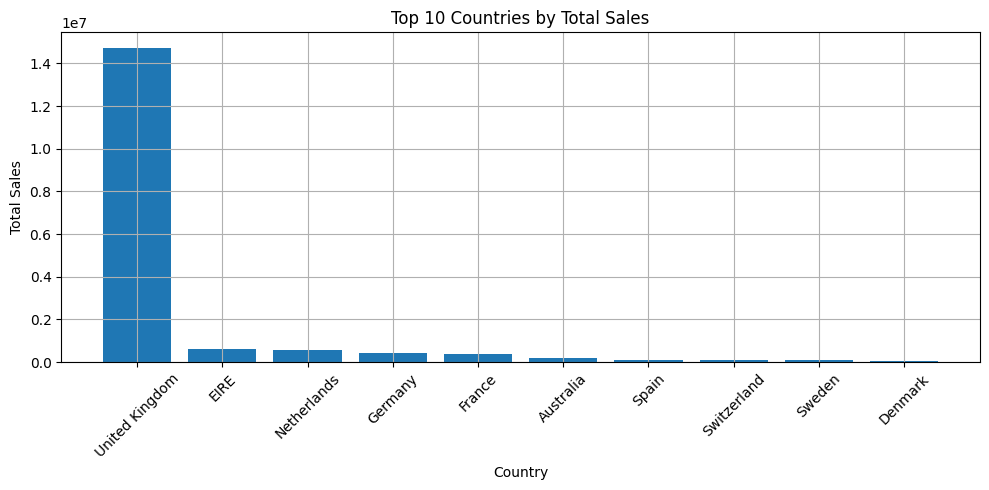

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV dataset (make sure it's cleaned beforehand or exported from Spark)
df = pd.read_csv("online_retail_ii.csv", encoding="ISO-8859-1")

# Preprocessing
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])        # Convert InvoiceDate to datetime
df["TotalPrice"] = df["Quantity"] * df["Price"]              # Calculate total price for each row
df = df.dropna()                                             # Remove rows with missing values
df = df[df["Quantity"] > 0]                                  # Keep only rows with positive quantity

# Group sales by country and calculate the total sales per country
sales_by_country = df.groupby("Country")["TotalPrice"].sum().reset_index()

# Sort the result by total sales in descending order and take the top 10 countries
sales_by_country = sales_by_country.sort_values("TotalPrice", ascending=False).head(10)

# Plot the top 10 countries by total sales
plt.figure(figsize=(10, 5))
plt.bar(sales_by_country["Country"], sales_by_country["TotalPrice"])
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)       # Rotate x-axis labels for readability
plt.grid(True)                # Show grid lines
plt.tight_layout()            # Adjust layout to avoid clipping
plt.show()                    # Display the plot


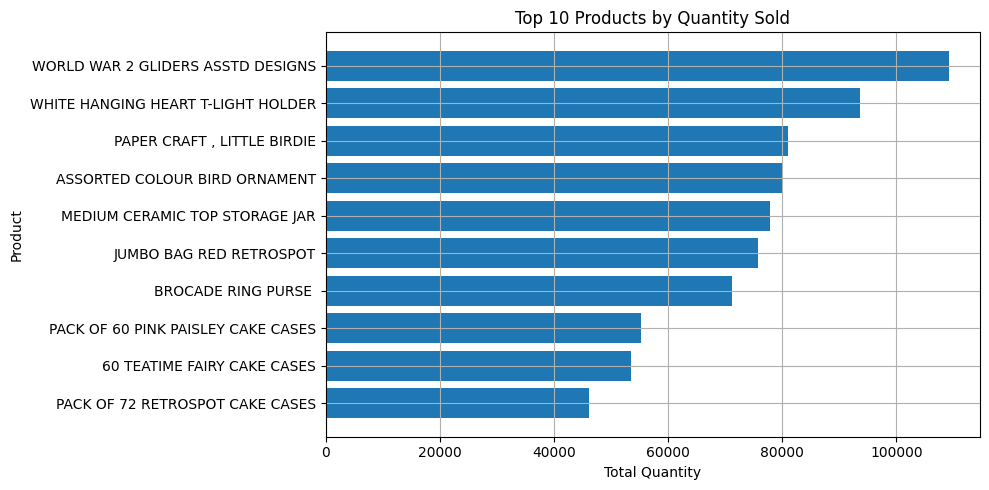

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned or original CSV file (already preprocessed if needed)
df = pd.read_csv("online_retail_ii.csv", encoding="ISO-8859-1")

# Data cleaning and TotalPrice column creation
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])       # Convert InvoiceDate to datetime
df["TotalPrice"] = df["Quantity"] * df["Price"]             # Compute total price per transaction
df = df.dropna()                                            # Drop rows with any null values
df = df[df["Quantity"] > 0]                                 # Keep only rows with positive quantity

# Group by product description to compute total quantity sold per product
top_quantity_products = df.groupby("Description")["Quantity"].sum().reset_index()

# Sort by quantity in descending order and keep the top 10 products
top_quantity_products = top_quantity_products.sort_values("Quantity", ascending=False).head(10)

# Plot the results as a horizontal bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_quantity_products["Description"], top_quantity_products["Quantity"])
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity")
plt.ylabel("Product")
plt.gca().invert_yaxis()  # Show the most sold product at the top
plt.grid(True)
plt.tight_layout()
plt.show()


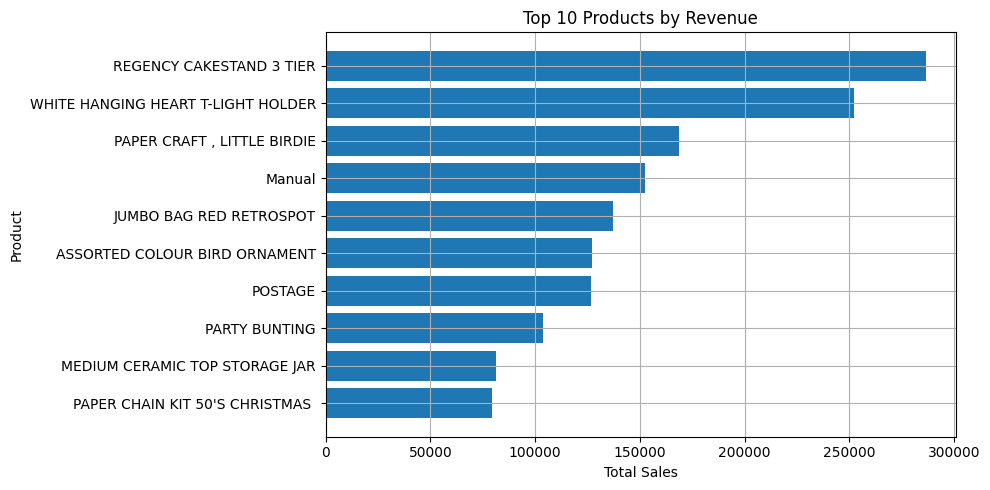

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("online_retail_ii.csv", encoding="ISO-8859-1")

# Preprocessing
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])   # Convert InvoiceDate to datetime
df = df.dropna()                                        # Remove rows with missing values
df = df[df["Quantity"] > 0]                             # Keep only positive quantities
df["TotalPrice"] = df["Quantity"] * df["Price"]         # Create new column for total price

# Group by product description to calculate total revenue per product
top_products = df.groupby("Description")["TotalPrice"].sum().reset_index()
top_products = top_products.sort_values("TotalPrice", ascending=False).head(10)

# Plot the top 10 products by total revenue
plt.figure(figsize=(10, 5))
plt.barh(top_products["Description"], top_products["TotalPrice"])
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.gca().invert_yaxis()  # Show the most sold product on top
plt.grid(True)
plt.tight_layout()
plt.show()
